<a href="https://colab.research.google.com/github/helenross636/cvclasses19/blob/master/Slepneva_Elena_PM_21M_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
СЛЕПНЕВА ЕЛЕНА ПМ-21М

# Лабораторная работа №2. Линейные модели для задач регрессии

В данной лабораторной работе рассматриваются задачи регрессии.
Частным случаем является задача линейной регрессии.
Используется следующая модель:
$$
y = \sum_{k=0}^{M-1} w_k \phi_k(\mathbf{x}) = \mathbf{w}^T \mathbf{\phi}(\mathbf{x}),
$$
где $\mathbf{\phi}(\mathbf{x}) = \left(1, \phi_1(\mathbf{x}), \dots, \phi_{M-1}(\mathbf{x})\right)^T$,
$\mathbf{w} = \left(w_0, w_1, \dots, w_{M-1}\right)^T$.

В данной работе в качестве функции штрафа используется средняя квадратичная ошибка:
$$
E_D(\mathbf{w}, \mathbf{T}) = \frac{1}{2} \sum_{n=1}^{N} \left( t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n) \right)^2.
$$

Решение задачи минимизации такого штрафа даёт параметры распознавателя
$$
\mathbf{w_{ML}} = \left(\mathbf{\Phi}^T \mathbf{\Phi}\right)^{-1} \mathbf{\Phi}^T \mathbf{T}.
$$

В случае добавления $L2$-регуляризации (гребневая регрессия) штраф:
$$
E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} \left( t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n) \right)^2 + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w},
$$
МНК-решением будет
$$
\mathbf{w_{ML}} = \left(\mathbf{\Phi}^T \mathbf{\Phi} + \lambda \mathbf{E} \right)^{-1} \mathbf{\Phi}^T \mathbf{T}.
$$

In [2]:
import numpy as np
import sklearn as sk
from sklearn import datasets, model_selection, metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.grid'] = True

## Задание №1

Реализуйте функцию, которая возвращает параметры модели, найденные с помощью метода наименьших квадратов.
Операция умножения в `numpy` - это `np.matmul` или `@`.
Перевод массива в тип матрица осуществляется с помощью `np.asmatrix`.
Транспонирование матрицы `x` - это операция `x.T`.
Получение из матрицы `x` линейный массив - это операция `x.A1`.

In [3]:
class LeastSquare:
    def __init__(self, x, y):
        x =  np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        y = np.array(y)
        self.w = np.linalg.pinv(x)@y
    
    def __call__(self, x):
        x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        return x@self.w

# Тестирование

test_x = np.array([[0, 1, 2], [3, 4, 5]])
lsm = LeastSquare(test_x, [-1, 1])
assert np.linalg.norm(lsm(test_x) - [-1, 1]) < 1, 'Метод недостаточно точный'

## Задание №2

In [4]:
x, y = sk.datasets.make_regression(n_samples=100, n_features=1, noise=1.5, bias=13, random_state=125)
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size = 0.2, random_state=25)
print(x_train.shape, y_train.shape)

(80, 1) (80,)


Запустите МНК для сгенерированного датасета.
Постройте графики, на которых изображены истинные и предсказанные значения, для тестовой и обучающей выборки.
Приведите значения MSE-ошибки для обеих выборок на тестовой и обучающей части.
$$
MSE = \frac{1}{N} \sum_{n=0}^{N-1} \left( t_n - y_n \right)^2.
$$
Сравните ошибки на обучающей и тестовой выборках, сделайте выводы.

Ошибка на обучающей выборке 1.4960934564178494
Ошибка на тестовой выборке 3.0893595077011087


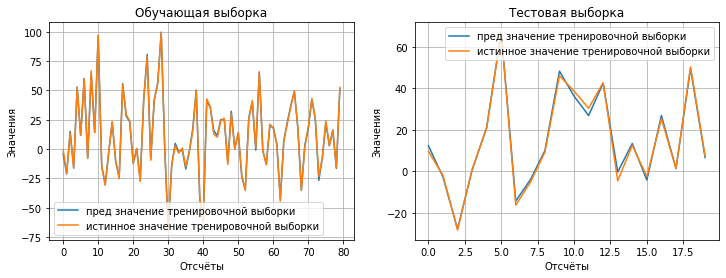

In [5]:
regressor = LeastSquare(x_train, y_train)

ry_train, ry_test = regressor(x_train), regressor(x_test)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))

ax0.plot(ry_train, label='пред значение тренировочной выборки')
ax0.plot(y_train, label='истинное значение тренировочной выборки')
ax0.set(xlabel='Отсчёты', ylabel='Значения', title='Обучающая выборка')
ax0.legend()

ax1.plot(ry_test, label='пред значение тренировочной выборки')
ax1.plot(y_test, label='истинное значение тренировочной выборки')
ax1.set(xlabel='Отсчёты', ylabel='Значения', title='Тестовая выборка')
ax1.legend()

print('Ошибка на обучающей выборке', sk.metrics.mean_squared_error(y_train,ry_train))
print('Ошибка на тестовой выборке', sk.metrics.mean_squared_error(y_test,ry_test))

Ошибка на тестовой выборке больше, чем ошибка на обучающей выборке. 
Это объясняется размером тестовой и обучающей выборок. 
Из графиков видно, что модель достаточно хорошо предсказывает значения. 

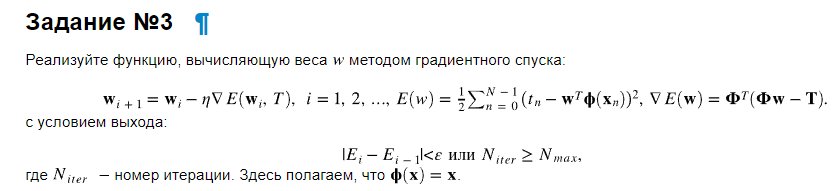

In [36]:
class GradientDescend:
    def __init__(self, x, y, eta=1e-3, eps=1e-6, n_iter=5000):
        self.eta, self.eps, self.n_iter = eta, eps, n_iter
        
        x = np.array(x)
        x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        y = np.array(y)
        self.w = np.random.uniform(-1,1,size = len(x[0]))
        
        eps_prev = -1
        eps_cur = 1
        self.last_iter = 0
    
        while (self.last_iter<=self.n_iter) and (abs(eps_prev-eps_cur)>=self.eps):
            self.last_iter += 1
            grad = x.T@(x@self.w-y)
            self.w = self.w - eta*grad
            eps_prev = eps_cur
            
            eps_cur = len(self.w)*1/2*sk.metrics.mean_squared_error(y,x@self.w)
            self.last_error = eps_cur
            
        
        
    def __call__(self, x):
        x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        return x@self.w

# Тестирование

test_x = np.array([[0, 1, 2], [3, 4, 5]])
gd = GradientDescend(test_x, [-1, 1])
assert np.linalg.norm(gd(test_x) - [-1, 1]) < 1, 'Метод недостаточно точный'

Запустите полученную модель для датасета.
Сравните ошибки на выборках, полученные методом градиентного спуска.
Стали ли результаты лучше метода наименьших квадратов из предыдущего пункта?

**Замечание**.
Чтобы добиться приемлемых результатов (малого значения MSE), возможно, потребуется подобрать подходящие параметры шага градиентного спуска $\eta$ и максимального количества итераций. Для начала возьмите:

* $w_0 = \left( {w_0}_0, {w_0}_1, \dots, {w_0}_{n-1} \right)$, где каждая компонента ${w_0}_i$ распределена равномерно на отрезке $[-1, 1]$;
* $\eta = 10^{-3}$; 
* $\varepsilon = 10^{-6}$;
* $N_{max} = 5000$.

Ошибка на обучающей выборке 1.496093467306063
Ошибка на тестовой выборке 3.089321020899985


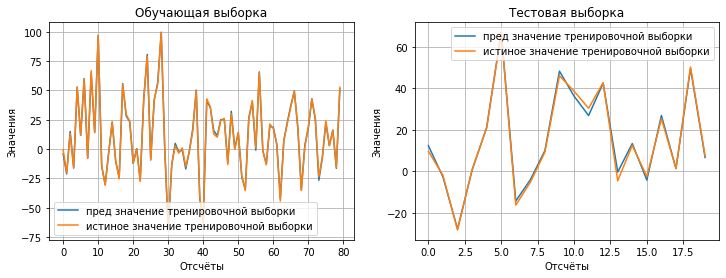

In [16]:
regressor = GradientDescend(x_train, y_train)

ry_train, ry_test = regressor(x_train), regressor(x_test)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))

ax0.plot(ry_train, label='пред значение тренировочной выборки')
ax0.plot(y_train, label='истиное значение тренировочной выборки')
ax0.set(xlabel='Отсчёты', ylabel='Значения', title='Обучающая выборка')
ax0.legend()


ax1.plot(ry_test, label='пред значение тренировочной выборки')
ax1.plot(y_test, label='истиное значение тренировочной выборки')
ax1.set(xlabel='Отсчёты', ylabel='Значения', title='Тестовая выборка')
ax1.legend()

print('Ошибка на обучающей выборке', sk.metrics.mean_squared_error(y_train,ry_train))
print('Ошибка на тестовой выборке', sk.metrics.mean_squared_error(y_test,ry_test))



**Вопросы**:

2. Как параметр $\eta$ влияет на количество итераций?

 $\eta$ >0 определяет скорость сходимости поиска. 
Если данный параметр выбрать слишком большим, минмум может быть не найден вовсе, даже если он на самом деле есть.


Результаты обоих методов (градиентного спуска и наименьших квадратов) схожи. 
Расхождение не превосходят  $10^{-3}$.

## Задание №4

Сгенерируйте датасет с нелинейными данными:

* $x$ - это вектор из 15 элементов, значения которого распределены равномерно на интервале $[-1; 1]$;
* $y$ - это синусоида от значений $x$, смещенных на $0.7$, к которой прибавлен шум в виде нормального распределения $N(0.1, 0.2)$;
* выделите из полученных данных обучающую и тестовую выборки.
Размер тестовой выборки составляет 20%.

(12, 1) (12,)


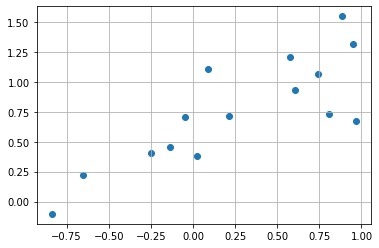

In [27]:
rng = np.random.default_rng(seed=4)
x = rng.uniform(low=-1.0, high=1.0, size = 15)
y = np.sin(x+0.7)+rng.normal(0.1,0.2,size=len(x))
plt.scatter(x, y)

x = np.array([np.array([i]) for i in x])
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size = 0.2, random_state=43)
print(x_train.shape, y_train.shape)

Примените один из предыдущих методов на полученном датасете.
Постройте гистограмму ошибок предсказания, полученных на обучающих и тестовых данных.
Дайте оценку качеству предсказания, оценивая его по величине MSE.

Ошибка на обучающей выборке: 0.058346471086385944
Ошибка на тестовой выборке: 0.11545001163448475


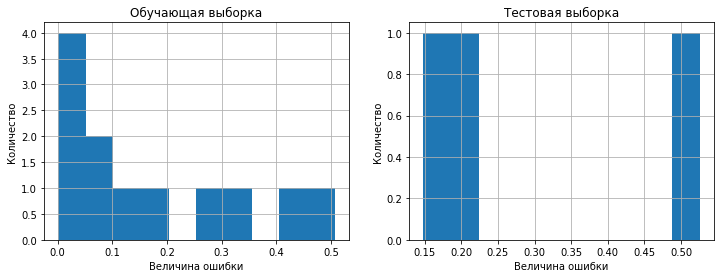

In [28]:
regressor = LeastSquare(x_train, y_train)

ry_train, ry_test = regressor(x_train), regressor(x_test)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))
ax0.hist(abs(ry_train - y_train))
ax0.set(xlabel='Величина ошибки', ylabel='Количество', title='Обучающая выборка')

ax1.hist(abs(ry_test - y_test))
ax1.set(xlabel='Величина ошибки', ylabel='Количество', title='Тестовая выборка')

print('Ошибка на обучающей выборке:', sk.metrics.mean_squared_error(ry_train,y_train))
print('Ошибка на тестовой выборке:', sk.metrics.mean_squared_error(ry_test,y_test))

Ошибка на тестовой выборке в 2 раза больше, чем ошибка на обучающей выборке. 

## Задание №5

Создайте функцию-декоратор для добавления степенной зависимости в произвольную модель регрессии.

In [30]:
def PolyDecorator(clazz, *args, **kwargs):
    class PolyDecoratorClass(clazz):
        def __init__(self, p, x, *args):
            super().__init__(PolyDecoratorClass.poly(x, p), *args)
            self.p = p
        
        def __call__(self, x):
            return super().__call__(PolyDecoratorClass.poly(x, self.p))
        
        @staticmethod
        def poly(x, k):
            return np.concatenate([x**p for p in range(1, k + 1)], axis=1)

    return PolyDecoratorClass(*args, **kwargs)

Попробуйте улучшить результат для датасета.
Используйте модель
$$
y_{pred} = w_0 + w_1 x + w_2 x^2 + \dots + w_p x^p.
$$

Рассмотрите полиномы порядков $p$ от 2 до 10.

Как порядок влияет на качество?
Чтобы ответить на этот вопрос, нужно привести значения MSE для обучающей и тестовой выборок в виде графика
(зависимость MSE-ошибки $E$ от порядка полинома $p$).
Выберите наилучшую модель.

Порядок: 2, ошибка на тестовой выборке: 0.09999501834110165


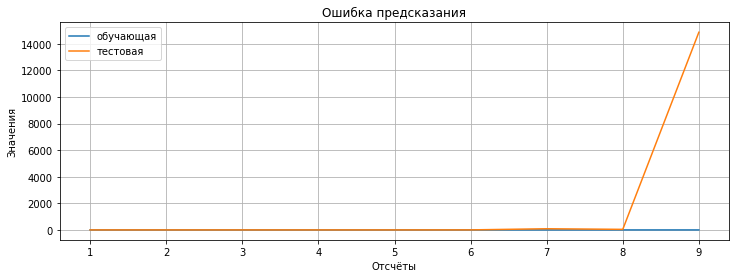

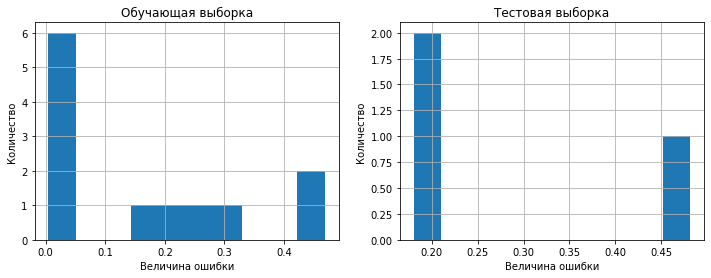

In [33]:
powers = np.arange(1, 10)
train_err, test_err, regr = [], [], []
for p in powers:
    regressor = PolyDecorator(LeastSquare, p, x_train, y_train)
    ry_train, ry_test = regressor(x_train), regressor(x_test)
    
    train_err.append(sk.metrics.mean_squared_error(ry_train,y_train))
    test_err.append(sk.metrics.mean_squared_error(ry_test,y_test))
    regr.append(regressor)

fig, ax = plt.subplots(figsize=(2*6, 4))
ax.plot(powers, train_err, label='обучающая')
ax.plot(powers, test_err, label='тестовая')
ax.set(xlabel='Отсчёты', ylabel='Значения', title='Ошибка предсказания')
ax.legend()

k = np.argmin(test_err)

ry_train, ry_test = regr[k](x_train), regr[k](x_test)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))
ax0.hist(abs(ry_train - y_train))
ax0.set(xlabel='Величина ошибки', ylabel='Количество', title='Обучающая выборка')

ax1.hist(abs(ry_test - y_test))
ax1.set(xlabel='Величина ошибки', ylabel='Количество', title='Тестовая выборка')


print(f"Порядок: {powers[k]}, ошибка на тестовой выборке: {test_err[k]}")

Удалось ли с полиномиальной регрессией достичь лучших результатов, чем с линейной регрессией?

Да, полиномиальная регрессия позволяет снизить на  (0.11545001163448475-0.09999501834110165) ~0.01546 ошибку тестовой выборке. Если увеличить тестовую выборку, результат будет более наглядным.

## Задание №6

Добавьте $L2$-регуляризацию для модели из пункта 5
$$
E_r = \frac{1}{2} \sum_{n=0}^{N-1} \left( t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n) \right)^2 + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}.
$$

Для этого отнаследуйтесь от регрессора и переопределите его конструктор.

In [34]:
class LeastSquareMod(LeastSquare):
    def __init__(self, x, y, alpha):
        x = np.array(x)
        x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        y = np.array(y)
        E = np.ones(x.shape[1])
        self.w = np.linalg.inv(x.T@x+alpha*E)@x.T@y

Подберите параметр регуляризации.
Для этого постройте heat-карту, показывающую значение MSE в зависимости от порядка полинома $p$ и значения параметра регуляризации $\lambda$.

Порядок: 2, параметр alpha: 100.0, ошибка на тестовой выборке: 0.039060356335680176


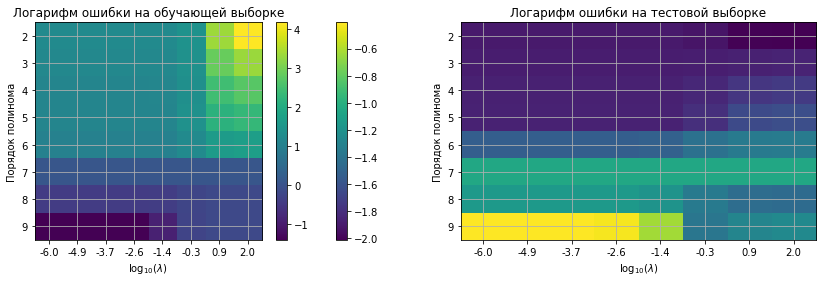

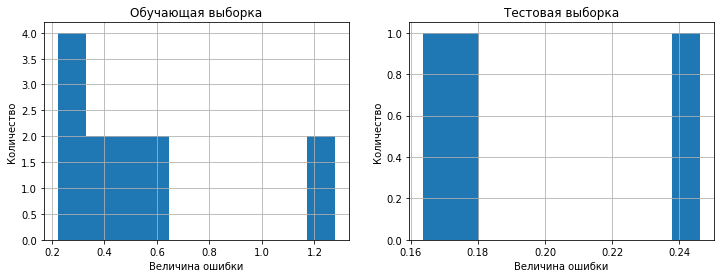

In [35]:
powers = np.arange(2, 10)
alphas = np.logspace(-6, 2, 8)
err = np.zeros((len(powers), len(alphas)))
errt = err.copy()
regr = []
for i, p in enumerate(powers):
    for j, a in enumerate(alphas):
        regressor = PolyDecorator(LeastSquareMod, p, x_train, y_train, a)
        ry_train, ry_test = regressor(x_train), regressor(x_test)
        err[i][j] = sk.metrics.mean_squared_error(ry_train,y_train)
        errt[i][j] = sk.metrics.mean_squared_error(ry_test,y_test)
        regr.append(regressor)


fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*7, 4))
im0 = ax0.imshow(np.log10(err), cmap='viridis', aspect='auto')
ax0.set(xlabel='$\log_{10}(\lambda)$', ylabel='Порядок полинома', title='Логарифм ошибки на обучающей выборке')
ax0.set(xticks=range(len(alphas)), xticklabels=np.log10(alphas).round(decimals=1))
ax0.set(yticks=range(len(powers)), yticklabels=powers)
fig.colorbar(im0, ax=ax0)



im1 = ax1.imshow(np.log10(errt), cmap='viridis', aspect='auto')
ax1.set(xlabel='$\log_{10}(\lambda)$', ylabel='Порядок полинома', title='Логарифм ошибки на тестовой выборке')
ax1.set(xticks=range(len(alphas)), xticklabels=np.log10(alphas).round(decimals=1))
ax1.set(yticks=range(len(powers)), yticklabels=powers)
fig.colorbar(im1, ax=ax0)

k = np.argmin(errt)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))
ax0.hist(abs(regr[k](x_train) - y_train))
ax0.set(xlabel='Величина ошибки', ylabel='Количество', title='Обучающая выборка')
ax1.hist(abs(regr[k](x_test) - y_test))
ax1.set(xlabel='Величина ошибки', ylabel='Количество', title='Тестовая выборка')

i,j = np.unravel_index(errt.argmin(), errt.shape)
print(f"Порядок: {powers[i]}, параметр alpha: {alphas[j]}, ошибка на тестовой выборке: {errt[i][j]}")

**Вопросы**:

1. Какая модель (с регуляризацией или без) даёт лучшие результаты?
1. Получилось ли достичь лучших результатов при меньшем порядке полинома? 
1. Наблюдалось ли переобучение модели, и было ли оно устранено введением регуляризации?

**Ответы**: 

1. Модель с регуляризацией даёт лучший результат. Так как размер выборки сравнительно маленький, регуляризация позволяет нам компенсировать размер выборки (потому что регуляризация помогает с переобучением). 
1. Лучший результат был получен, когда степень полинома равнялась двум.
1. Если определять переобучение через значение ошибки, то при полиноме 9 степени можно наблюдать переобучение (и большей степени, конечно).